# Compare GlmnetClassifier with LogisticRegression

A comparison of LogisticRegression and :class:`GlmnetClassifier` over 20 synthetic classification problems.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from glmnet_classifier import GlmnetClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
clf_glm = GridSearchCV(
    GlmnetClassifier(), 
    {'alpha': np.linspace(0.0, 1.0, 20)}
)

methods = [
    ('Logit', LogisticRegressionCV()),
    ('GlmnetClassifier', clf_glm)
]

In [3]:
score = {}
for desc, _ in methods:
    score[desc] = {}
    score[desc]['AUC'] = []
    score[desc]['Accuracy'] = []

In [4]:
rng = np.random.RandomState(11)
for _ in range(20):
    # Make a classification problem
    X, y_d = make_classification(
        n_samples=100,
        n_features=10,
        n_informative=5,
        n_redundant=2,
        n_classes=2,
        hypercube=True,
        random_state=rng
    )
    scaler = StandardScaler()
    X_d = scaler.fit_transform(X)

    for desc, clf in methods:
        clf.fit(X_d, y_d)
        auc = roc_auc_score(y_true=y_d, y_score=clf.predict_proba(X_d)[:, 1])
        acc = accuracy_score(y_true=y_d, y_pred=clf.predict(X_d))
        score[desc]['AUC'].append(auc)
        score[desc]['Accuracy'].append(acc)

compare the mean of the differences of auc

In [5]:
diff = np.subtract(score['Logit']['AUC'], score['GlmnetClassifier']['AUC'])
df_describe = pd.DataFrame(diff)

plot the results

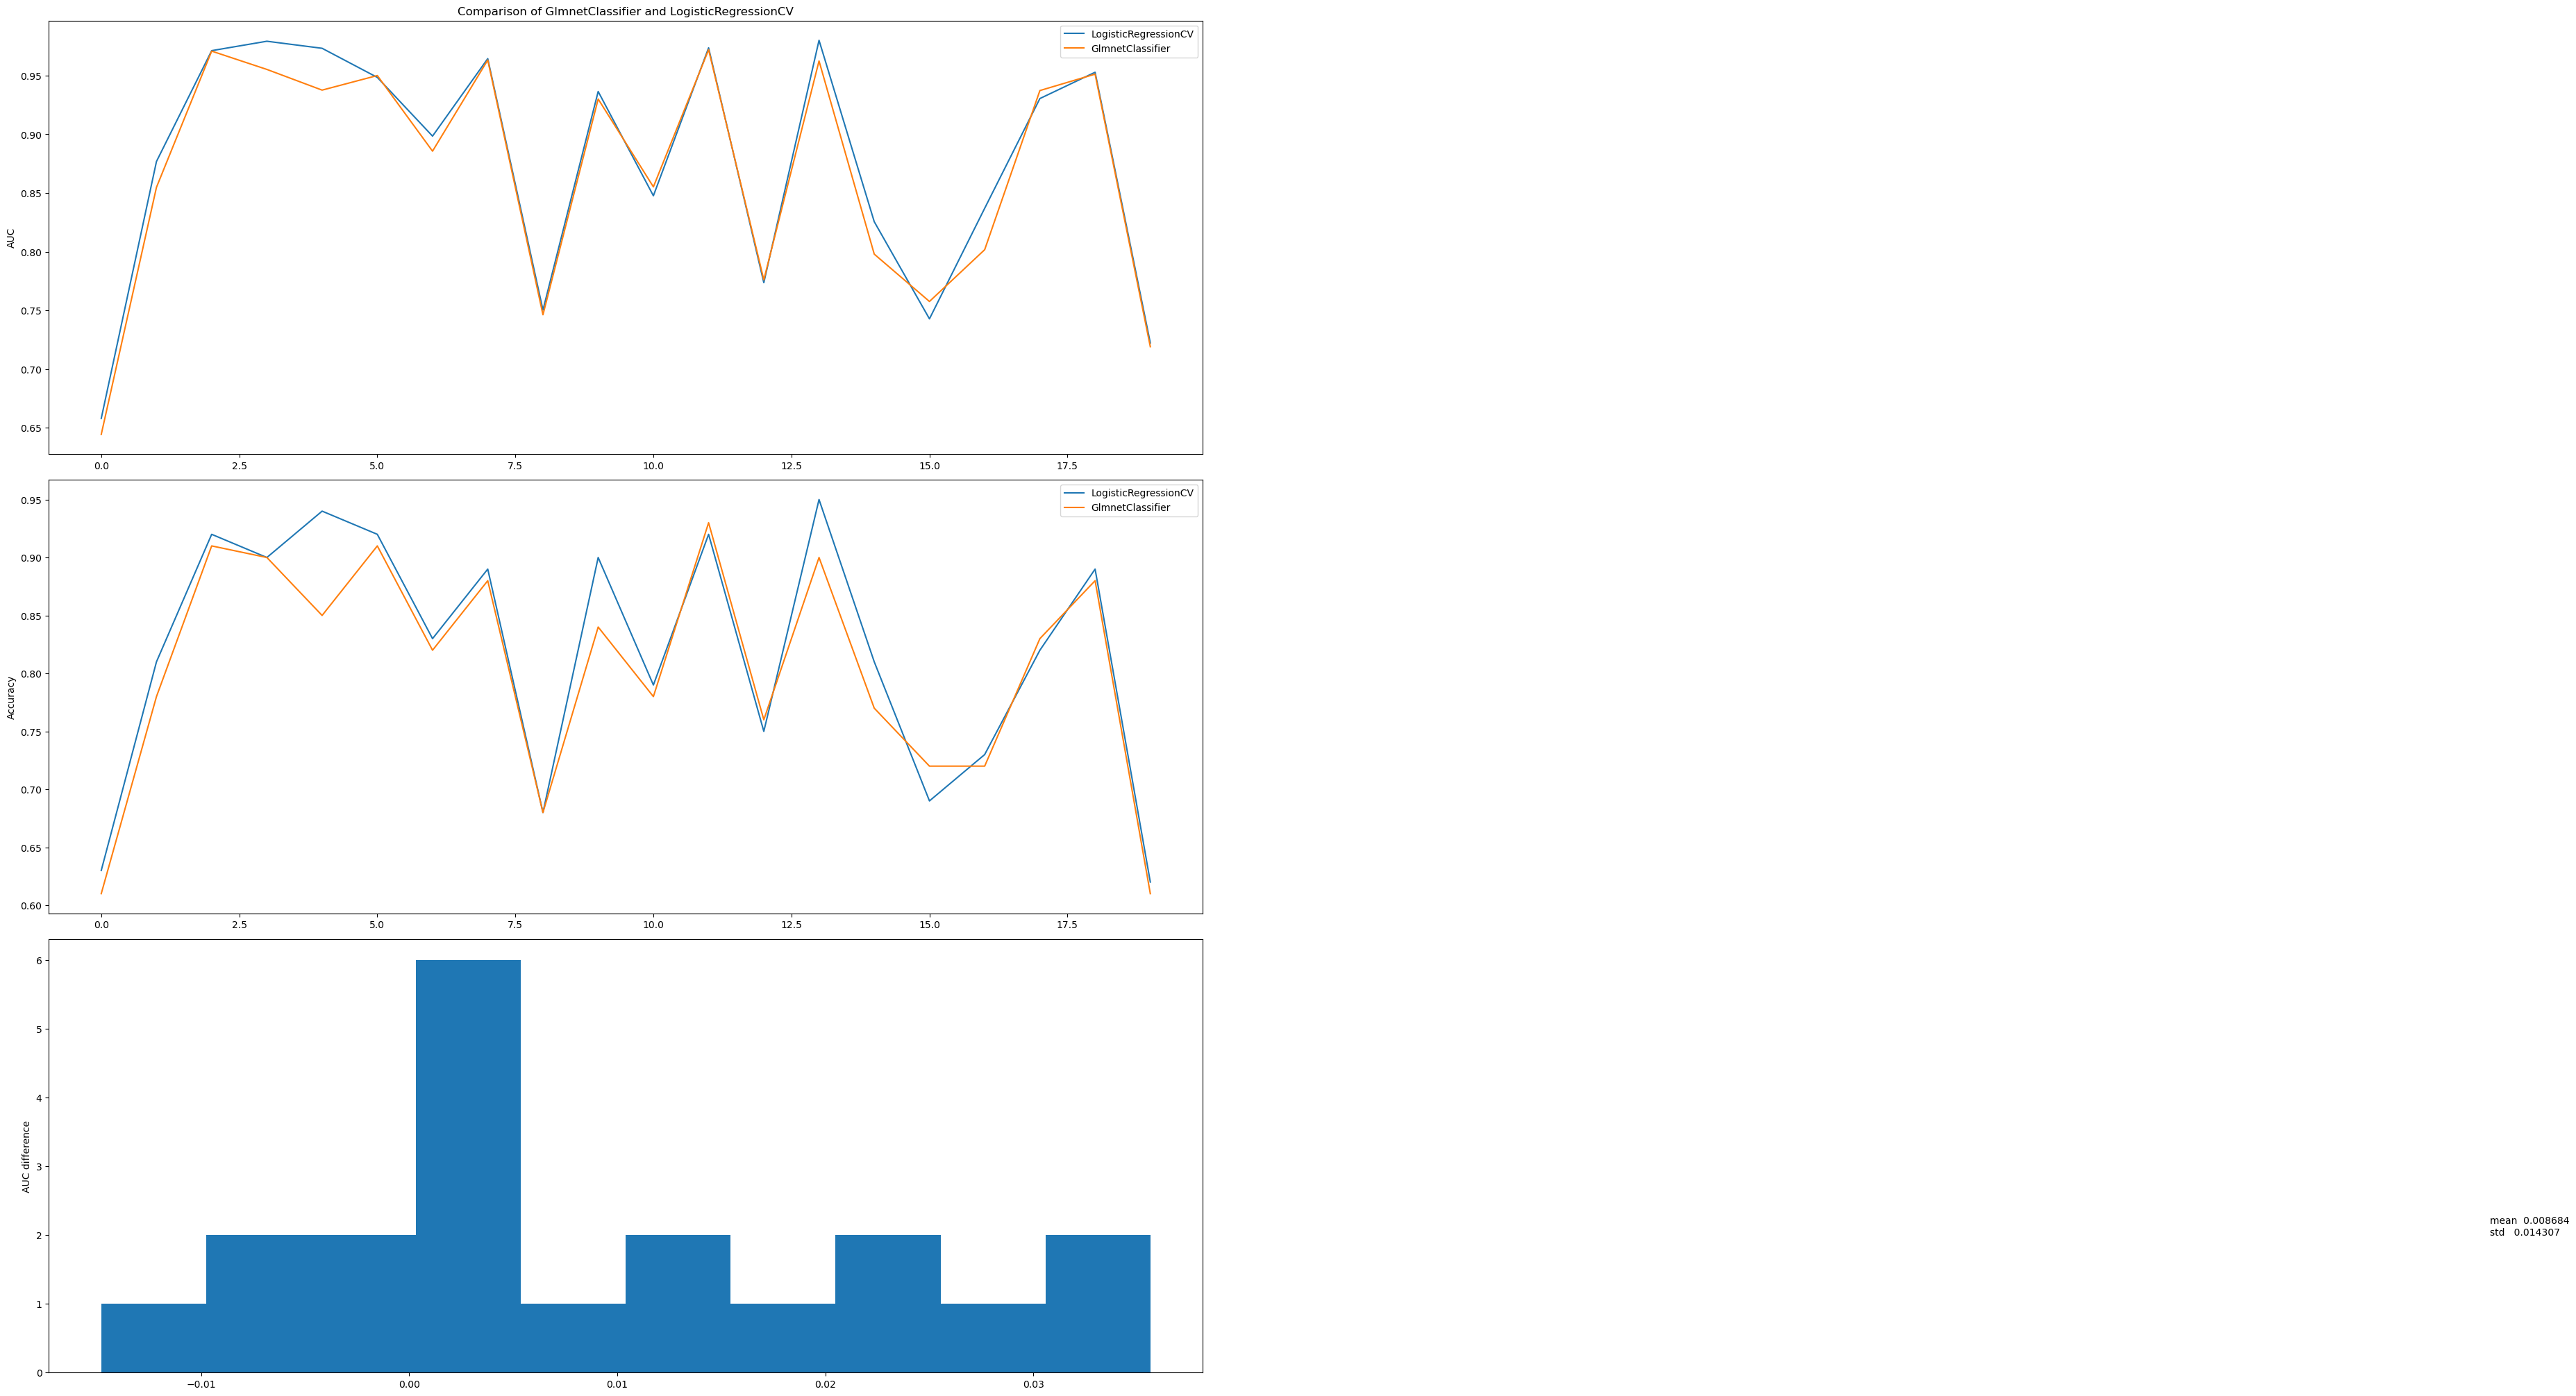

In [6]:
fig, axs = plt.subplots(3, 1, layout='constrained')
xdata = np.arange(len(score['Logit']['AUC']))
axs[0].plot(xdata, score['Logit']['AUC'], label='LogisticRegressionCV')
axs[0].plot(xdata, score['GlmnetClassifier']['AUC'], label='GlmnetClassifier')
axs[0].set_title('Comparison of GlmnetClassifier and LogisticRegressionCV')
axs[0].set_ylabel('AUC')
axs[0].legend()
axs[1].plot(xdata, score['Logit']['Accuracy'], label='LogisticRegressionCV')
axs[1].plot(xdata, score['GlmnetClassifier']['Accuracy'], label='GlmnetClassifier')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[2].hist(diff)
axs[2].set_ylabel('AUC difference')
stats = pd.DataFrame(diff).describe().loc[['mean', 'std']].to_string(header=False)
axs[2].text(.1, 2, stats)
fig.set_size_inches(20, 20)
plt.show()